In [154]:
import numpy as np
import pandas as pd
import seaborn as sb

In [155]:
train_data = pd.read_csv('/content/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
print("Number of instances = %d" % (train_data.shape[0]))
print("Number of attributes = %d" % (train_data.shape[1]))

Number of instances = 891
Number of attributes = 12


In [157]:
# checking for missing values among columns
missing_values = train_data.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [158]:
# get data type of columns
for col in train_data.columns:
  print(train_data[col].dtype)

int64
int64
int64
object
object
float64
int64
int64
object
float64
object
object


In [159]:
# Describe feature distribution
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Question 1:


*   **Which features are available in the dataset?** PassengerID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
*   **Which features are categorical?** Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked
*   **Which features are numerical?** Age, SibSp, Parch, Fare
*   **Which features are mixed data types?** None
*   **Which features may contain errors or typos?** Ticket, because it contains handwritten information which may have errors in transcription from written to digital data.
*   **Which features contain blank, null, or empty values?** Age, Cabin, and Fare (only in Test data)
*   **What are the data types for various features?** PassengerID (Integer), Survived (Integer), Pclass (Integer), Name (String), Sex (String), Age (Float), SibSp (Integer), Parch (Integer), Ticket (String), Fare (Float), Cabin (String), Embarked (Char)
*   **What is the distribution of numerical feature values across the samples?** See data.describe()
*   **What is the distribution of categorical features?** See data.describe()



Data Cleaning (Training):

Before we analyze the data, we need to clean it. Here are the issues that need to be addressed:

*   Missing values in age
*   Missing values in cabin
*   Missing values in Embarked
*   Ticket data cohesiveness

When we perform our correlations later, we will also map our categorical variables to numerical values. For now, let's simply clean the data.


In [160]:
# Let's first look at the missing values in cabin
train_data['Cabin'].isnull().sum()

687

In [161]:
train_data['Cabin']

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [162]:
# Since majority of the data is missing from 'Cabin', we will drop the column
train_data.drop('Cabin', axis=1, inplace=True)

In [163]:
# Now let's look at 'Age'
train_data['Age'].isnull().sum()

177

In [164]:
# Since a small percentage of the data is missing, let's just fill it with the mean of the remaining data
mean = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].replace(np.nan, int(mean))

In [165]:
train_data['Age'].isnull().sum() # The data has been successfully cleaned

0

In [166]:
# Now let's look at the missing data in 'Embarked'
train_data['Embarked'].isnull().sum()

2

In [167]:
# We only have 2 missing values, so we can just drop those rows where its empty.
train_data.dropna(subset=['Embarked'], inplace=True)

In [168]:
# Now let's look at the ticket data
train_data['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [169]:
# The ticket data is not consistently formated.
# Let's look at its stats
train_data['Ticket'].describe()

,Ticket
count,889
unique,680
top,347082
freq,7


In [170]:
# Most of the ticket values are unique.
# We could group them to make less categories, but the tickets do not follow a standard pattern.
# Additionally, we get more useful information from features like 'Pclass'
# Let's drop the 'Ticket' column
train_data.drop('Ticket', axis=1, inplace=True)

In [171]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [172]:
# Now that our data is cleaned, let's normalize it by transforming our categorical values into numerical values for analysis.
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [173]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


In [174]:
# We are left with 'Name' now.
# This is unique for all passengers and as such, is not a good measure of correlation with other features. Let's drop it.
train_data.drop('Name', axis=1, inplace=True)

In [175]:
# Drop PassengerId
train_data.drop('PassengerId', axis=1, inplace=True)

In [176]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,29.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Our training data is now cleaned. Let's move on to the testing data!

In [177]:
test_data = pd.read_csv('/content/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [178]:
# checking for missing values among columns
missing_values = test_data.isnull().sum()
missing_values

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


We have the following problems to clean in our testing data:

*   Missing values in 'Age'
*   Missing value in 'Fare'
*   Missing values in 'Cabin'

Let's start with the missing values in 'Age'

In [179]:
# Like with the training data, let's fill in the missing values for 'Age' with the mean
mean = test_data['Age'].mean()
test_data['Age'] = test_data['Age'].replace(np.nan, int(mean))

In [180]:
# Now let's look at the missing value in 'Fare'
# We only have one missing value, so let's fill it with the avg Fare for the associated 'Pclass' of that row

# Let's retrieve the row where the missing value is
missing_row = test_data[test_data['Fare'].isnull()]
missing_row

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [181]:
# The Pclass is '3'. Let's calculate the average fare for that class and use it as our substitution
avg_fare = test_data[test_data['Pclass'] == 3]['Fare'].mean()
test_data['Fare'] = test_data['Fare'].replace(np.nan, avg_fare)

In [182]:
# Now let's look at the missing values in cabin.
# Just like with the training data, we will drop this whole column
test_data.drop('Cabin', axis=1, inplace=True)

In [183]:
# Apply the same mappings to the categorical variables as we did for the training data
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

# Drop the unused columns like with the training data
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [184]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,30.0,0,0,8.0500,2


In [185]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,30.0,0,0,8.0500,2


Now, our testing and training data are both cleaned. Let's start to perform some data analysis on our training data.

Question 2: Get your assumptions based on data analysis

In [186]:
# Based off initial understandings of the Titanic, women and children were first evacuated.
# Let's see the percentages of women and children who survived.

# Women:
women_survived = train_data[(train_data['Sex'] == 0) & (train_data['Survived'] == 1)]
women_survival_rate = (len(women_survived) / len(train_data[train_data['Sex'] == 0])) * 100

# Children (Under age 18)
children_survived = train_data[(train_data['Age'] < 18) & (train_data['Survived'] == 1)]
children_survival_rate = (len(children_survived) / len(train_data[train_data['Age'] < 18])) * 100

print(f"Percentage of women who survived: {women_survival_rate:.2f}%")
print(f"Percentage of children who survived: {children_survival_rate:.2f}%")

Percentage of women who survived: 74.04%
Percentage of children who survived: 53.98%


In [187]:
# As we can see, most women survived.
# Children had a smaller survival rate than I anticipated, but their smaller/younger bodies may not have survived the cold journey to rescue after arriving on the lifeboat, for example.
# Let's see if higher class passengers (those who were more above deck than lower class passengers) survived more
rich_survived = train_data[(train_data['Pclass'] == 1) & (train_data['Survived'] == 1)]
rich_survival_rate = (len(rich_survived) / len(train_data[train_data['Pclass'] == 1])) * 100

print(f"Percentage of rich who survived: {rich_survival_rate:.2f}%")

Percentage of rich who survived: 62.62%


Let's do some feature correlations to learn more about the features.

Question 3. Analyze Feature Correlations by Pivoting Features Against Each Other and Question 4: Analyze by visualizing data

<Axes: >

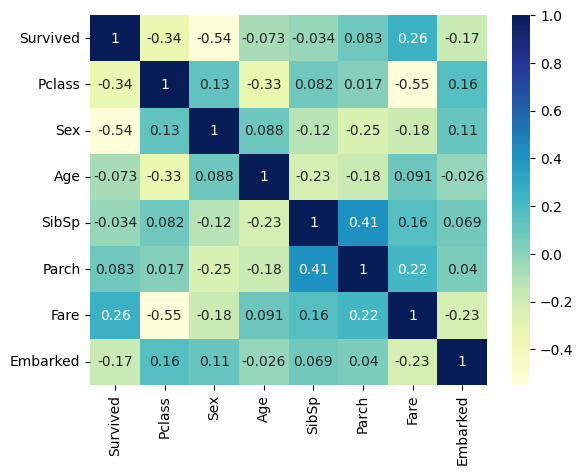

In [188]:
# First, let's make a correlation matrix to see any patterns among the features
corrmap = sb.heatmap(train_data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
corrmap

In [189]:
# Look at average survival rate by gender using pivot table
gender_survival = train_data.pivot_table(values='Survived', index='Sex', aggfunc='mean')
gender_survival

,Survived
Sex,
0,0.740385
1,0.188908


In [190]:
# Look at average survival rate by class
class_survival = train_data.pivot_table(values="Survived", index="Pclass", aggfunc="mean")
class_survival

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [191]:
# Combine both pivot tables to see how class and gender affect survival rates
gender_class_survival = train_data.pivot_table(values="Survived", index="Sex", columns='Pclass', aggfunc="mean")
gender_class_survival

Pclass,1,2,3
Sex,,,
0,0.967391,0.921053,0.500000
1,0.368852,0.157407,0.135447


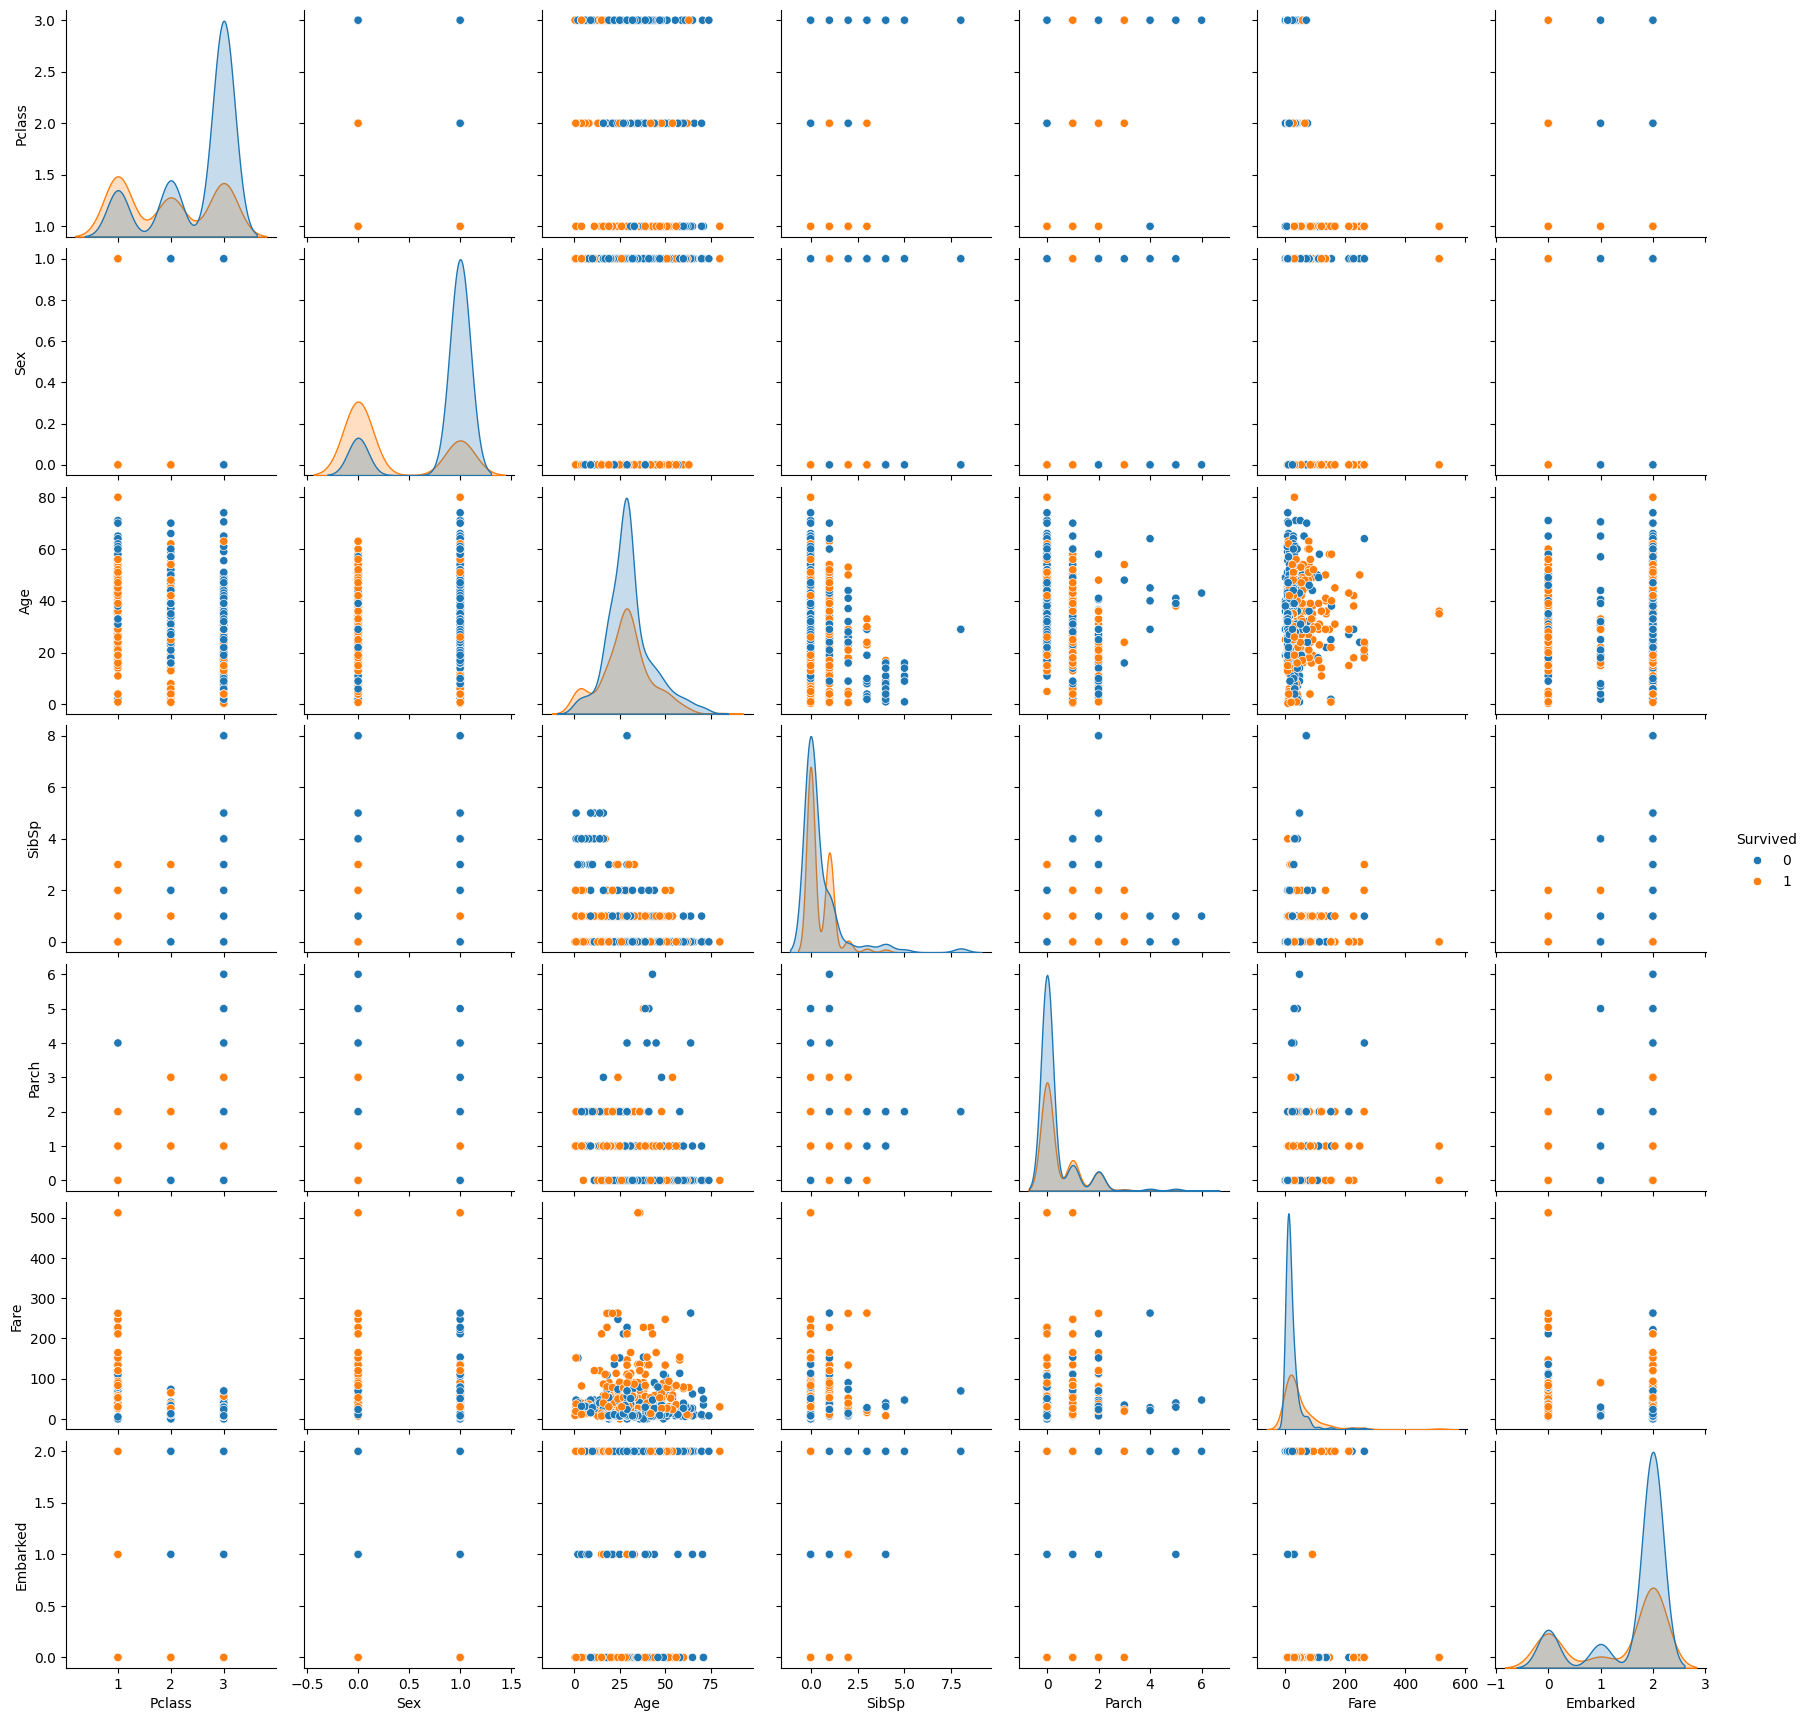

In [192]:
# Use pair plot to see how different features relate to survival
sb.pairplot(train_data, hue="Survived", diag_kind="kde")

Notes from pair plot:


*   Female have a higher survival rate than males, suggesting gender as a factor in survival
*   Passengers in first class have a higher survival rate
*   Older passengers have a lower survival rate, indicating potential age-based prioritization in rescue
*   Higher fares show a higher proportion of survivors (relating to higher class)

Question 5. Correcting datasets by removing features


*   Deleted Name, Ticket, Cabin columns



Question 6. Create new feature extracting from existing

In [193]:
# Combine SibSp and Parch as a 'FamilySize' feature to determine whether having family on board influenced survival
train_data['Family Size'] = train_data['SibSp'] + train_data['Parch']

In [194]:
# Add binary feature to determine if passenger was alone and see if this influenced survival rate
train_data['Solo'] = (train_data['Family Size'] == 0).astype(int)

In [195]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Solo
0,0,3,1,22.0,1,0,7.2500,2,1,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,1
888,0,3,0,29.0,1,2,23.4500,2,3,0
889,1,1,1,26.0,0,0,30.0000,0,0,1


In [200]:
# Bucket 'Age' into child, teen, adult, senior to capture survival differences across agre categories
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Solo,AgeGroup
0,0,3,1,22.0,1,0,7.2500,2,1,0,Adult
1,1,1,0,38.0,1,0,71.2833,0,1,0,Adult
2,1,3,0,26.0,0,0,7.9250,2,0,1,Adult
3,1,1,0,35.0,1,0,53.1000,2,1,0,Adult
4,0,3,1,35.0,0,0,8.0500,2,0,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,0,1,Adult
887,1,1,0,19.0,0,0,30.0000,2,0,1,Adult
888,0,3,0,29.0,1,2,23.4500,2,3,0,Adult
889,1,1,1,26.0,0,0,30.0000,0,0,1,Adult


Since we added some features to our training data, we will add the same features to our testing data as well.

In [ ]:
# Combine SibSp and Parch as a 'FamilySize' feature to determine whether having family on board influenced survival
test_data['Family Size'] = test_data['SibSp'] + test_data['Parch']

In [ ]:
# Add binary feature to determine if passenger was alone and see if this influenced survival rate
test_data['Solo'] = (test_data['Family Size'] == 0).astype(int)

In [ ]:
# Bucket 'Age' into child, teen, adult, senior to capture survival differences across agre categories
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=[0, 12, 18, 40, 60, 80], labels=[
                               'Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
test_data['AgeGroup'] = test_data['AgeGroup'].map(
    {'Child': 0, 'Teen': 1, 'Adult': 2, 'Middle-aged': 3, 'Senior': 4})
test_data